# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Farrel Jonathan Vickeldo
- **Email:** farrel.jonathan.fj@gmail.com
- **ID Dicoding:** falthackel

## Menentukan Pertanyaan Bisnis

- Bagaimana performa peminjaman dalam beberapa bulan terakhir?
- Apa pengaruh lingkungan terhadap peminjaman sepeda?
- Apakah peminjaman sepeda lebih banyak dilakukan oleh orang yang sedang bekerja atau tidak?

## Import Semua Packages/Library yang Digunakan

In [197]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Data Wrangling

### Gathering Data

Pertama-tama, dataset diunduh di drive. Kemudian, kita mounting drive supaya dapat memberikan akses google colab untuk mengakases data yang terdapat pada drive

In [198]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Tentukan path pada dataset `day.csv`

In [199]:
# Path to your CSV file in Google Drive
day_path = '/content/drive/MyDrive/Coursera/04. Belajar Analisis Data dengan Python/Proyek/day.csv'

# Read CSV file into DataFrame
day_df = pd.read_csv(day_path)

# Display DataFrame
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Tentukan path pada dataset `day.csv`

In [200]:
# Path to your CSV file in Google Drive
hour_path = '/content/drive/MyDrive/Coursera/04. Belajar Analisis Data dengan Python/Proyek/hour.csv'

# Read CSV file into DataFrame
hour_df = pd.read_csv(hour_path)

# Display DataFrame
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [201]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari hasil diatas, tidak terdapat missing value. Akan tetapi, kolom `dteday` seharusnya bertipe `datetime` bukan `object`. Jumlah data ada 731 entries.

In [202]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak terdapat keanehan dari data pada describe. Dengan demikian permasalahan pada data `day_df` hanya terdapat pada tipe data.

Namun, yang perlu diperhatikan adalah terjadi normalisasi data oleh beberapa kolom: `temp`, `atemp`, `hum`, `windspeed`

In [203]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dari hasil diatas, tidak terdapat missing value. Akan tetapi, kolom `dteday` seharusnya bertipe `datetime` bukan `object`. Selain itu, jumlah kolom pada dataset `hour.csv` lebih banyak 1 kolom daripada `day.csv`, yaitu pada kolom `hr`. Jumlah data ada 17379 entries.

In [204]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak terdapat keanehan dari data pada describe. Dengan demikian permasalahan pada data `hour_df` hanya terdapat pada tipe data

Namun, yang perlu diperhatikan adalah terjadi normalisasi data oleh beberapa kolom: `temp`, `atemp`, `hum`, `windspeed`

### Cleaning Data

1. Dataset `day_df`

Pertama, mengubah tipe data `object` menjadi `datetime` pada kolom `dteday`

In [205]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Kedua, membalikkan hasil normalisasi dari 4 kolom menjadi normal. Perkaliannya ditentukan berdasarkan informasi pada README.md dataset

In [206]:
day_df["temp"] *= 41
day_df["atemp"] *= 50
day_df["hum"] *= 100
day_df["windspeed"] *= 67

In [207]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


2. Dataset `hour_df`

Pertama, mengubah tipe data `object` menjadi `datetime` pada kolom `dteday`

In [208]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Kedua, membalikkan hasil normalisasi dari 4 kolom menjadi normal. Perkaliannya ditentukan berdasarkan informasi pada README.md dataset

In [209]:
hour_df["temp"] *= 41
hour_df["atemp"] *= 50
hour_df["hum"] *= 100
hour_df["windspeed"] *= 67

In [210]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


## Exploratory Data Analysis (EDA)

### Explore day_df

In [211]:
day_df.describe(include="all")

<ipython-input-211-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000


In [212]:
# Extract month from 'dteday' column
day_df['month'] = day_df['dteday'].dt.month

In [213]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "temp": ["max", "min", "mean", "std"],
    "hum": ["max", "min", "mean", "std"],
    "windspeed": ["max", "min", "mean", "std"],
})

instant       temp                                      hum           \
       nunique        max        min       mean       std      max      min   
season                                                                        
1          181  23.472500   2.424346  12.207650  4.212136  94.8261   0.0000   
2          184  33.141653  10.374763  22.320611  5.028649  92.2500  25.4167   
3          188  35.328347  19.235847  28.958682  2.904749  93.9565  36.0000   
4          178  26.957500   9.054153  17.339148  4.421179  97.2500  33.3478   

                              windspeed                                 
             mean        std        max       min       mean       std  
season                                                                  
1       58.290291  15.187972  34.000021  3.042356  14.373984  5.791401  
2       62.694833  15.284075  26.000489  4.417256  13.634978  4.799113  
3       63.348206  11.934864  25.166339  4.292744  11.530366  3.988275  
4       66.871917  13.124796  28.292425  1.500244  11.523637  5.464839

Peminjaman cukup serupa antarsetiap musim dengan peminjaman terbanyak pada musim gugur.
- Musim semi
  - Suhu berada pada rentang 2.42 °C hingga 23.47 °C dengan mean 12.21 °C dan std 4.21 °C
  - Kelembapan berada pada rentang 0 hingga 94.83 g/m^3 dengan mean 58.29 g/m^3 dan std 15.19 g/m^3
  - Kecepatan angin berada pada rentang 3.04 km/h hingga 34 km/h dengan mean 14.37 km/h dan std 5.79 km/h
- Musim panas
  - Suhu berada pada rentang 10.37 °C hingga 33.14 °C dengan mean 22.32 °C dan std 5.03 °C
  - Kelembapan berada pada rentang 25.42 g/m^3 hingga 92.25 g/m^3 dengan mean 62.69 g/m^3 dan std 15.28 g/m^3
  - Kecepatan angin berada pada rentang 4.42 km/h hingga 26 km/h dengan mean 13.63 km/h dan std 4.80 km/h
- Musim gugur
  - Suhu berada pada rentang 19.24 °C hingga 35.33 °C dengan mean 28.96 °C dan std 2.90 °C
  - Kelembapan berada pada rentang 36 g/m^3 hingga 93.96 g/m^3 dengan mean 63.35 g/m^3 dan std 11.93 g/m^3
  - Kecepatan angin berada pada rentang 4.29 km/h hingga 25.17 km/h dengan mean 11.53 km/h dan std 3.99 km/h
- Musim dingin
  - Suhu berada pada rentang 9.05 °C hingga 26.96 °C dengan mean 17.34 °C dan std 4.42 °C
  - Kelembapan berada pada rentang 33.35 g/m^3 hingga 97.25 g/m^3 dengan mean 66.87 g/m^3 dan std 13.12 g/m^3
  - Kecepatan angin berada pada rentang 1.5 km/h hingga 28.29 km/h dengan mean 11.52 km/h dan std 5.46 km/h

In [214]:
day_df.groupby(by=["season", "month"]).agg({
    "instant": "nunique",
    "weathersit": ["max", "min", "mean", "std"],
    "temp": ["max", "min", "mean", "std"],
    "hum": ["max", "min", "mean", "std"],
    "windspeed": ["max", "min", "mean", "std"],
    "cnt" : 'count'
})

instant weathersit                               temp             \
             nunique        max min      mean       std        max        min   
season month                                                                    
1      1          62          3   1  1.419355  0.529410  17.425000   2.424346   
       2          57          3   1  1.368421  0.522069  21.388347   5.227500   
       3          40          3   1  1.375000  0.540062  23.472500   8.131653   
       12         22          3   1  1.545455  0.595801  17.561653   8.849153   
2      3          22          3   1  1.590909  0.590326  24.668347  10.374763   
       4          60          3   1  1.416667  0.561223  27.230847  12.300000   
       5          62          2   1  1.403226  0.494550  31.775000  16.980847   
       6          40          2   1  1.275000  0.452203  33.141653  22.174153   
3      6          20          2   1  1.150000  0.366348  34.200847  25.864153   
       7          62          3   1  1.193548  0.437531  35.328347  24.429153   
       8          62          2   1  1.306452  0.464783  32.526653  26.069153   
       9          44          3   1  1.500000  0.628768  30.886653  19.235847   
4      9          16          2   1  1.500000  0.516398  26.650000  21.080847   
       10         62          3   1  1.564516  0.643275  26.957500  10.420847   
       11         60          3   1  1.350000  0.577106  21.730000  10.079153   
       12         40          3   1  1.525000  0.598609  19.509153   9.054153   

                                       hum                                 \
                   mean       std      max      min       mean        std   
season month                                                                
1      1       9.694201  3.413911  91.1250  31.1250  58.582827  15.094211   
       2      12.268284  3.456893  92.9167  18.7917  56.746468  14.593142   
       3      16.012501  4.250943  94.8261   0.0000  56.983105  17.385165   
       12     12.215995  2.560784  85.8333  44.1250  63.842477  11.997029   
2      3      16.011340  4.465546  91.8333  29.0000  62.237318  20.573795   
       4      19.269952  3.577446  88.8333  25.4167  58.806312  16.737713   
       5      24.386735  2.992979  92.2500  36.0417  68.895831  11.839906   
       6      27.164208  2.631475  83.3333  30.5000  59.167702  11.307843   
3      6      29.815540  1.912156  77.0417  36.0000  54.406250  11.137079   
       7      30.974287  2.129953  86.5417  39.6250  59.787632  10.367657   
       8      29.051844  1.636442  85.0000  41.5000  63.773010  10.051036   
       9      25.597755  2.659503  93.9565  50.1667  71.831316  11.810364   
4      9      24.390739  1.982996  97.2500  46.7083  70.481769  15.489133   
       10     19.885500  3.444389  90.6250  46.3333  69.376087  10.954731   
       11     15.138010  2.645619  96.2500  33.3478  62.487648  12.839484   
       12     13.873371  2.752093  97.0417  48.5000  68.122917  14.350472   

              windspeed                                  cnt  
                    max       min       mean       std count  
season month                                                  
1      1      27.833743  4.917519  13.822285  5.363222    62  
       2      34.000021  3.042356  14.450824  6.091763    57  
       3      29.584721  7.417168  15.157842  5.571285    40  
       12     27.292182  3.167425  14.304489  6.726238    22  
2      3      25.917007  6.000406  14.489990  4.616189    22  
       4      26.000489  4.417256  15.710310  5.172675    60  
       5      22.958689  5.000712  12.260258  4.223581    62  
       6      22.999693  5.167375  12.182538  4.001338    40  
3      6      23.292014  6.333731  12.904325  4.353300    20  
       7      19.082471  5.416950  11.125941  2.930981    62  
       8      25.166339  4.708981  11.585516  4.311703    62  
       9      23.958329  4.292744  11.398001  4.593952    44  
4      9      16.374800  3.375406  10.349210  4.043011    16  
 

In [215]:
# Create a pivot table to count the number of rentals for each month
day_df.groupby(by=["workingday", "weekday"]).agg({
    "instant": "nunique",
    "cnt": 'count',
})

instant  cnt
workingday weekday              
0          0            105  105
           1             15   15
           2              1    1
           3              1    1
           4              2    2
           5              2    2
           6            105  105
1          1             90   90
           2            103  103
           3            103  103
           4            102  102
           5            102  102

Asumsikan working day adalah hari Senin s.d. Jumat dengan hari Senin adalah hari ke-1 hingga Jumat adalah hari ke-5. Dalam dataset, setidaknya masing-masing hari memiliki jadwal tidak bekerja. Namun, peminjaman yang dilakukan tidak banyak

In [216]:
# Count the number of working days in the dataset
day_num_working_days = day_df[day_df['workingday'] == 1].shape[0]
day_num_not_working_days = day_df[day_df['workingday'] == 0].shape[0]

# Display the result
print("Number of rental in working days in the dataset:", day_num_working_days)
print("Number of rental not in working days in the dataset:", day_num_not_working_days)

Number of rental in working days in the dataset: 500
Number of rental not in working days in the dataset: 231


Terdapat lebih banyak peminjaman disaat hari bekerja dibandingkan saat liburan

In [217]:
# Calculate average rental duration for working day score 1
day_avg_duration_workingday = day_df[day_df['workingday'] == 1]['cnt'].mean()
day_std_duration_workingday = day_df[day_df['workingday'] == 1]['cnt'].std()

# Calculate average rental duration for working day score 0
day_avg_duration_not_workingday = day_df[day_df['workingday'] == 0]['cnt'].mean()
day_std_duration_not_workingday = day_df[day_df['workingday'] == 0]['cnt'].std()

# Display the result
print("The average duration of rental in working days:", day_avg_duration_workingday)
print("Std:", day_std_duration_workingday)
print("\nThe average duration of rental in working days:", day_avg_duration_not_workingday)
print("Std:", day_std_duration_not_workingday)

The average duration of rental in working days: 4584.82
Std: 1878.4155828260175

The average duration of rental in working days: 4330.168831168831
Std: 2052.1412448375504


### Explore `hour_df`

In [218]:
hour_df.describe(include="all")

<ipython-input-218-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000


In [219]:
# Extract month from 'dteday' column
hour_df['month'] = hour_df['dteday'].dt.month

In [220]:
hour_df.groupby(by=["season", "month"]).agg({
    "instant": "nunique",
    "weathersit": ["max", "min", "mean", "std"],
    "temp": ["max", "min", "mean", "std"],
    "hum": ["max", "min", "mean", "std"],
    "windspeed": ["max", "min", "mean", "std"],
    "cnt" : 'count'
})

instant weathersit                           temp         \
             nunique        max min      mean       std    max    min   
season month                                                            
1      1        1429          4   1  1.456963  0.642018  23.78   0.82   
       2        1341          3   1  1.459359  0.673061  27.06   2.46   
       3         949          3   1  1.409905  0.615848  29.52   4.92   
       12        523          3   1  1.562141  0.687505  21.32   5.74   
2      3         524          3   1  1.591603  0.697720  29.52   6.56   
       4        1437          3   1  1.456507  0.667872  32.80   9.84   
       5        1488          3   1  1.461694  0.664103  36.90  13.94   
       6         960          3   1  1.315625  0.578882  38.54  18.86   
3      6         480          3   1  1.241667  0.496263  40.18  21.32   
       7        1488          3   1  1.254032  0.522510  41.00  23.78   
       8        1475          3   1  1.322712  0.580313  37.72  21.32   
       9        1053          3   1  1.489079  0.670625  35.26  15.58   
4      9         384          3   1  1.486979  0.673898  31.16  17.22   
       10       1451          3   1  1.509993  0.690130  30.34   9.02   
       11       1437          3   1  1.403619  0.617695  26.24   8.20   
       12        960          3   1  1.511458  0.631031  24.60   5.74   

                                     hum                              \
                   mean       std    max   min       mean        std   
season month                                                           
1      1       9.743597  4.096338  100.0  21.0  58.093072  18.819737   
       2      12.308561  4.280341  100.0   8.0  56.721104  20.426090   
       3      16.024131  5.088914  100.0   0.0  57.052687  22.052138   
       12     12.221606  3.073029  100.0  31.0  63.837476  16.354501   
2      3      16.032252  4.931173  100.0  16.0  62.259542  23.903995   
       4      19.270856  4.624631  100.0  16.0  58.811413  21.862700   
       5      24.386734  3.983271  100.0  21.0  68.895833  17.750851   
       6      27.164208  3.774607  100.0  20.0  59.167708  18.105184   
3      6      29.815542  3.465756   94.0  22.0  54.406250  18.391235   
       7      30.974288  3.399199   94.0  16.0  59.787634  17.192116   
       8      29.056908  2.957676   94.0  25.0  63.722712  16.885551   
       9      25.599886  3.447992  100.0  28.0  71.796771  15.950390   
4      9      24.390729  2.831584  100.0  28.0  70.481771  19.116782   
       10     19.974431  4.138385  100.0  27.0  68.949001  16.877658   
       11     15.137189  3.616814  100.0  16.0  62.504523  17.735153   
       12     13.873375  3.506634  100.0  26.0  68.122917  17.629352   

             windspeed                             cnt  
                   max  min       mean       std count  
season month                                            
1      1       43.9989  0.0  13.905913  8.423712  1429  
       2       54.0020  0.0  14.469407  9.970645  1341  
       3       46.0022  0.0  15.143631  8.766156   949  
       12      43.9989  0.0  14.321538  9.648714   523  
2      3       46.0022  0.0  14.483022  7.739875   524  
       4       47.9988  0.0  15.699657  8.529899  1437  
       5       40.9973  0.0  12.260253  7.233002  1488  
       6       39.0007  0.0  12.182540  7.047437   960  
3      6       35.0008  0.0  12.904326  7.569310   480  
       7       56.9969  0.0  11.125944  6.783734  1488  
       8       55.9986  0.0  11.488388  7.661126  1475  
       9       43.0006  0.0  11.390668  7.408371  1053  
4      9       30.0026  0.0  10.349214  6.770702   384  
       10      39.0007  0.0  11.518584  8.199831  1451  
       11      43.0006  0.0  12.312176  8.127898  1437  
       12      43.0006  0.0  10.473370  7.578338   960

In [221]:
# Create a pivot table to count the number of rentals for each month
hour_df.groupby(by=["workingday", "weekday"]).agg({
    "instant": "nunique",
    "cnt": 'count',
})

instant   cnt
workingday weekday               
0          0           2502  2502
           1            357   357
           2             23    23
           3             24    24
           4             48    48
           5             48    48
           6           2512  2512
1          1           2122  2122
           2           2430  2430
           3           2451  2451
           4           2423  2423
           5           2439  2439

Kita buat 3 kolom baru pada hour_df. Kolom pertama adalah `rental_duration` untuk mengetahui durasi rental yang dilakukan pada sekali peminjaman. Kolom ini ditentukan nilainya berdasarkan hasil perkalian dari jumlah peminjaman dan berapa jam peminjaman tersebut.

Setelah itu, `rental_duration` akan dipetakan nilainya ke dua kolom yang menyatakan apakah peminjaman dilakukan saat workingdays atau tidak.

In [222]:
# Sort the DataFrame by 'dteday' and 'hr' for each rental order
hour_df.sort_values(by=['dteday', 'hr'], inplace=True)

# Calculate the duration of bike rentals in one order
hour_df['rental_duration'] = hour_df.groupby(['dteday', 'hr'])['cnt'].transform('sum')

# Differentiate rental duration based on whether it's a working day or not
hour_df['workingday_duration'] = hour_df.apply(lambda row: row['rental_duration'] if row['workingday'] == 1 else None, axis=1)
hour_df['non_workingday_duration'] = hour_df.apply(lambda row: row['rental_duration'] if row['workingday'] == 0 else None, axis=1)

# # Display the DataFrame with rental durations based on working day
# print("Rental durations based on working day:")
# print(hour_df[['dteday', 'hr', 'workingday', 'workingday_duration']].drop_duplicates())

# # Display the DataFrame with rental durations based on non-working day
# print("\nRental durations based on non-working day:")
# print(hour_df[['dteday', 'hr', 'workingday', 'non_workingday_duration']].drop_duplicates())

In [223]:
hour_df.fillna(0, inplace=True)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,month,rental_duration,workingday_duration,non_workingday_duration
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,14.395,81.0,0.0,3,13,16,1,16,0.0,16.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,13.635,80.0,0.0,8,32,40,1,40,0.0,40.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,13.635,80.0,0.0,5,27,32,1,32,0.0,32.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,14.395,75.0,0.0,3,10,13,1,13,0.0,13.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,14.395,75.0,0.0,0,1,1,1,1,0.0,1.0


In [224]:
# Merge day_df and hour_df into all_df
all_df = pd.merge(
    left=day_df,
    right=hour_df[['dteday', 'hr', 'rental_duration', 'workingday_duration', 'non_workingday_duration']],
    how="left",
    on=["dteday"]
)

# Display the merged DataFrame
all_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,month,hr,rental_duration,workingday_duration,non_workingday_duration
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,...,80.5833,10.749882,331,654,985,1,0,16,0.0,16.0
1,1,2011-01-01,1,0,1,0,6,0,2,14.110847,...,80.5833,10.749882,331,654,985,1,1,40,0.0,40.0
2,1,2011-01-01,1,0,1,0,6,0,2,14.110847,...,80.5833,10.749882,331,654,985,1,2,32,0.0,32.0
3,1,2011-01-01,1,0,1,0,6,0,2,14.110847,...,80.5833,10.749882,331,654,985,1,3,13,0.0,13.0
4,1,2011-01-01,1,0,1,0,6,0,2,14.110847,...,80.5833,10.749882,331,654,985,1,4,1,0.0,1.0


In [225]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   instant                  17379 non-null  int64         
 1   dteday                   17379 non-null  datetime64[ns]
 2   season                   17379 non-null  int64         
 3   yr                       17379 non-null  int64         
 4   mnth                     17379 non-null  int64         
 5   holiday                  17379 non-null  int64         
 6   weekday                  17379 non-null  int64         
 7   workingday               17379 non-null  int64         
 8   weathersit               17379 non-null  int64         
 9   temp                     17379 non-null  float64       
 10  atemp                    17379 non-null  float64       
 11  hum                      17379 non-null  float64       
 12  windspeed                17379 n

In [226]:
all_df.describe(include="all")

<ipython-input-226-cd3b87c92b29>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  all_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,month,hr,rental_duration,workingday_duration,non_workingday_duration
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,NaN,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,20.376474,...,62.722884,12.736539,854.339720,3679.353242,4533.692963,6.537775,11.546752,189.463088,131.906899,57.556189
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,7.480257,...,14.177918,5.172685,685.686754,1544.953518,1917.376947,3.438776,6.914405,181.387599,177.423540,128.869465
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,...,0.000000,1.500244,2.000000,20.000000,22.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,185.000000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.940000,...,52.000000,9.041650,318.000000,2545.000000,3214.000000,4.000000,6.000000,40.000000,0.000000,0.000000


Terlihat ada total 17379 data entries dengan data unik dari kolom `dteday` adalah 731 yang menyatakan 731 entries dari day_df

In [227]:
all_df.groupby(by=["season", "month"]).agg({
    "instant": "nunique",
    "weathersit": ["max", "min", "mean", "std"],
    "temp": ["max", "min", "mean", "std"],
    "hum": ["max", "min", "mean", "std"],
    "windspeed": ["max", "min", "mean", "std"],
})

instant weathersit                               temp             \
             nunique        max min      mean       std        max        min   
season month                                                                    
1      1          62          3   1  1.411477  0.514531  17.425000   2.424346   
       2          57          3   1  1.369873  0.518712  21.388347   5.227500   
       3          40          3   1  1.370917  0.529148  23.472500   8.131653   
       12         22          3   1  1.546845  0.583296  17.561653   8.849153   
2      3          22          3   1  1.589695  0.578097  24.668347  10.374763   
       4          60          3   1  1.416841  0.556872  27.230847  12.300000   
       5          62          2   1  1.403226  0.490710  31.775000  16.980847   
       6          40          2   1  1.275000  0.446747  33.141653  22.174153   
3      6          20          2   1  1.150000  0.357444  34.200847  25.864153   
       7          62          3   1  1.193548  0.434134  35.328347  24.429153   
       8          62          2   1  1.305085  0.460599  32.526653  26.069153   
       9          44          3   1  1.497626  0.619122  30.886653  19.235847   
4      9          16          2   1  1.500000  0.500652  26.650000  21.080847   
       10         62          3   1  1.536871  0.617435  26.957500  10.420847   
       11         60          3   1  1.350731  0.572849  21.730000  10.079153   
       12         40          3   1  1.525000  0.591388  19.509153   9.054153   

                                       hum                                 \
                   mean       std      max      min       mean        std   
season month                                                                
1      1       9.743597  3.424972  91.1250  31.1250  58.093073  14.804313   
       2      12.308562  3.419969  92.9167  18.7917  56.721104  14.470095   
       3      16.024129  4.212221  94.8261   0.0000  57.052685  17.007828   
       12     12.221600  2.512659  85.8333  44.1250  63.837480  11.731456   
2      3      16.032255  4.369564  91.8333  29.0000  62.259541  20.111500   
       4      19.270858  3.547202  88.8333  25.4167  58.811414  16.612854   
       5      24.386735  2.969742  92.2500  36.0417  68.895831  11.747983   
       6      27.164208  2.599728  83.3333  30.5000  59.167703  11.171420   
3      6      29.815540  1.865684  77.0417  36.0000  54.406250  10.866407   
       7      30.974287  2.113417  86.5417  39.6250  59.787632  10.287165   
       8      29.056907  1.629153  85.0000  41.5000  63.722714   9.910966   
       9      25.599886  2.631793  93.9565  50.1667  71.796771  11.665742   
4      9      24.390739  1.922532  97.2500  46.7083  70.481769  15.016854   
       10     19.974433  3.390167  90.6250  46.3333  68.949004  10.660474   
       11     15.137187  2.621304  96.2500  33.3478  62.504521  12.721405   
       12     13.873371  2.718891  97.0417  48.5000  68.122917  14.177342   

              windspeed                                 
                    max       min       mean       std  
season month                                            
1      1      27.833743  4.917519  13.905914  5.319098  
       2      34.000021  3.042356  14.469406  6.064773  
       3      29.584721  7.417168  15.143629  5.517982  
       12     27.292182  3.167425  14.321531  6.588943  
2      3      25.917007  6.000406  14.483025  4.525284  
       4      26.000489  4.417256  15.699659  5.131089  
       5      22.958689  5.000712  12.260258  4.190790  
       6      22.999693  5.167375  12.182538  3.953064  
3      6      23.292014  6.333731  12.904325  4.247499  
       7      19.082471  5.416950  11.125941  2.908226  
       8      25.166339  4.708981  11.488383  4.163467  
       9      23.958329  4.292744  11.390668  4.532533  
4      9      16.374800  3.375406  10.349210  3.919735  
       10     28.292425  1.500244  11.518583  5.615106  
       11     25.250357  3.125550  12.31

In [228]:
all_df.groupby(by=["season", "month"]).agg({
    "cnt" : 'count',
    "hr" : ["max", "min", "mean", "std"],
    "rental_duration": ["max", "min", "mean", "std"],
    "workingday_duration": ["max", "min", "mean", "std"],
    "non_workingday_duration": ["max", "min", "mean", "std"],
})

cnt  hr                          rental_duration      \
             count max min       mean       std             max min   
season month                                                          
1      1      1429  23   0  11.696991  6.898412             559   1   
       2      1341  23   0  11.662192  6.896028             610   1   
       3       949  23   0  11.596417  6.906429             801   1   
       12      523  23   0  11.575526  6.918209             472   1   
2      3       524  23   0  11.555344  6.925912             957   1   
       4      1437  23   0  11.517049  6.921709             822   1   
       5      1488  23   0  11.500000  6.924514             873   1   
       6       960  23   0  11.500000  6.925795             869   1   
3      6       480  23   0  11.500000  6.929408             900   2   
       7      1488  23   0  11.500000  6.924514             913   1   
       8      1475  23   0  11.503729  6.904206             941   1   
       9      1053  23   0  11.527066  6.916564             977   1   
4      9       384  23   0  11.500000  6.931217             967   2   
       10     1451  23   0  11.547209  6.929772             963   1   
       11     1437  23   0  11.518441  6.919995             729   1   
       12      960  23   0  11.500000  6.925795             759   1   

                                     workingday_duration                   \
                    mean         std                 max  min        mean   
season month                                                                
1      1       94.424773   99.907146               559.0  0.0   65.721484   
       2      112.865026  112.486565               610.0  0.0   82.777032   
       3      149.699684  157.223951               801.0  0.0  104.320337   
       12      82.214149   80.568788               472.0  0.0   56.873805   
2      3      165.753817  174.083908               957.0  0.0  129.891221   
       4      187.260960  181.137902               822.0  0.0  125.146138   
       5      222.907258  187.721497               873.0  0.0  151.770833   
       6      240.577083  199.395333               869.0  0.0  163.416667   
3      6      240.391667  189.352188               900.0  0.0  176.760417   
       7      231.819892  187.483806               913.0  0.0  155.530914   
       8      238.097627  200.444648               941.0  0.0  184.256949   
       9      237.036087  211.371622               977.0  0.0  152.914530   
4      9      251.020833  223.209229               967.0  0.0  163.041667   
       10     222.158511  203.477057               963.0  0.0  151.713990   
       11     177.335421  158.973887               729.0  0.0  121.058455   
       12     175.039583  155.509511               759.0  0.0  127.451042   

                         non_workingday_duration                              
                     std                     max  min       mean         std  
season month                                                                  
1      1       98.361276                   512.0  0.0  28.703289   63.890412  
       2      114.419666                   499.0  0.0  30.087994   67.426066  
       3      146.956366                   690.0  0.0  45.379347  112.254897  
       12      83.774964                   313.0  0.0  25.340344   48.590229  
2      3      172.917673                   638.0  0.0  35.862595   98.686228  
       4      170.403395                   712.0  0.0  62.114823  139.037079  
       5      186.723284                   730.0  0.0  71.136425  148.260466  
       6      199.650381                   702.0  0.0  77.160417  158.565813  
3      6      195.335680                   609.0  0.0  63.631250  142.267910  
       7      196.980520                   632.0  0.0  76.288978  141.758245  
       8      210.079305                   654.0  0.0  53.840678  126.092193  
       9      206.723007                   783.0  0.0  84.121557  166.417647  
4      9      21

## Visualization & Explanatory Analysis

### Pertanyaan 1: performa peminjaman dalam beberapa bulan terakhir

In [229]:
# Extract year from the 'dteday' column
all_df['yr'] = all_df['dteday'].dt.year

# Resample the DataFrame based on 'month' and calculate aggregated values
monthly_rental_df = all_df.groupby(['yr', 'month']).agg({
    "cnt": "count",                      # Count of rental records for the month
    "hr": "mean",                        # Mean of hour values for the month
    "rental_duration": "sum"            # Sum of rental durations for the month
})

# Rename the columns
monthly_rental_df.rename(columns={
    "cnt": "total_rental",
    "hr": "mean_duration",
    "rental_duration": "total_duration_of_rental"
}, inplace=True)

# Reset index to convert the index to columns
monthly_rental_df.reset_index(inplace=True)

In [230]:
# Filter DataFrame for year 2011
monthly_rental_df_2011 = monthly_rental_df[monthly_rental_df['yr'] == 2011].copy()

# Filter DataFrame for year 2012
monthly_rental_df_2012 = monthly_rental_df[monthly_rental_df['yr'] == 2012].copy()

# # Display the resulting DataFrames
# print("Resampled DataFrame for year 2011:")
# print(monthly_rental_df_2011.head())

# print("\nResampled DataFrame for year 2012:")
# print(monthly_rental_df_2012.head())

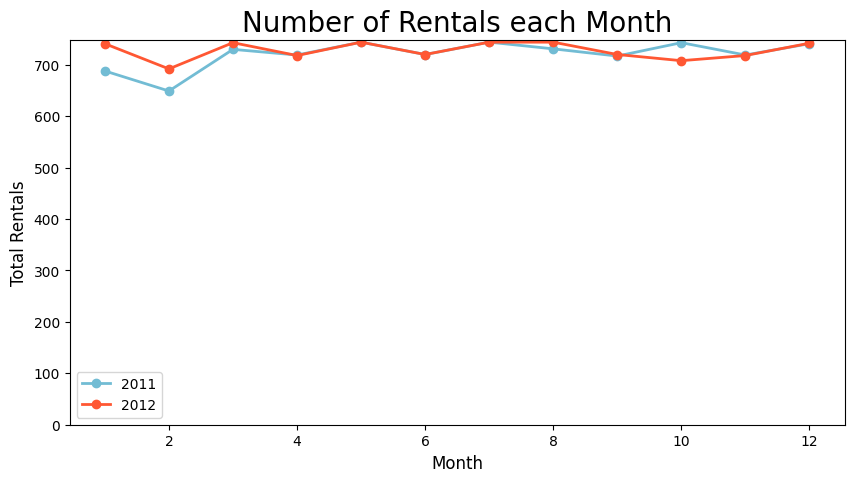

In [231]:
plt.figure(figsize=(10, 5))

# Plot for 2011 data
plt.plot(monthly_rental_df_2011["month"], monthly_rental_df_2011["total_rental"], marker='o', linewidth=2, color="#72BCD4", label='2011')

# Plot for 2012 data
plt.plot(monthly_rental_df_2012["month"], monthly_rental_df_2012["total_rental"], marker='o', linewidth=2, color="#FF5733", label='2012')

plt.title("Number of Rentals each Month", loc="center", fontsize=20)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Rentals", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0)  # Set y-scale from 0
plt.legend()
plt.show()

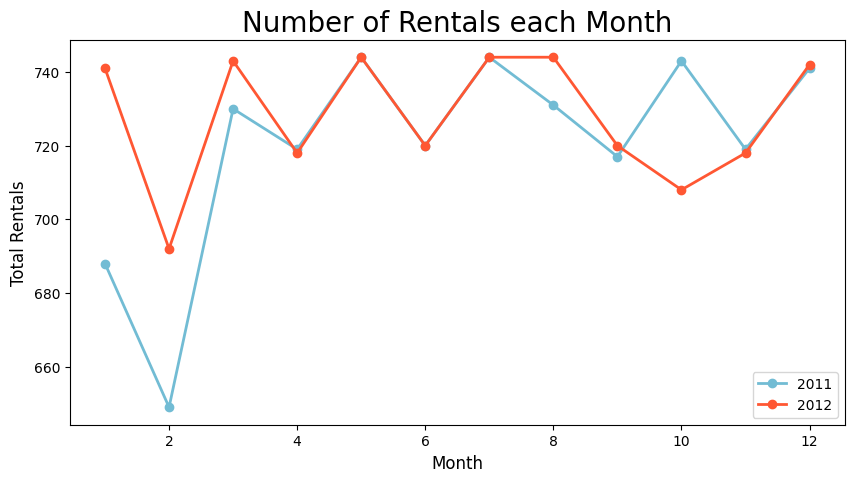

In [232]:
plt.figure(figsize=(10, 5))

# Plot for 2011 data
plt.plot(monthly_rental_df_2011["month"], monthly_rental_df_2011["total_rental"], marker='o', linewidth=2, color="#72BCD4", label='2011')

# Plot for 2012 data
plt.plot(monthly_rental_df_2012["month"], monthly_rental_df_2012["total_rental"], marker='o', linewidth=2, color="#FF5733", label='2012')

plt.title("Number of Rentals each Month", loc="center", fontsize=20)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Rentals", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.show()

Dari sini, terlihat bahwa peminjaman paling rendah berada di Bulan 2 yang menandakan musim semi, baik pada tahun 2011 ataupun 2012. Setelah bulan 2, penjualan melesat tinggi dan berfluktuasi di atas 700 rental. Total rental tertinggi pada tahun 2011 berada di bulan Mei, Juli, dan Oktober. Pada tahun 2012 rental tertinggi berada di bulan Januari, Maret, Mei, Juli, Agustus, dan Desember. Dengan demikian, rental tertinggi berada di kisaran bulan Mei dan Juli

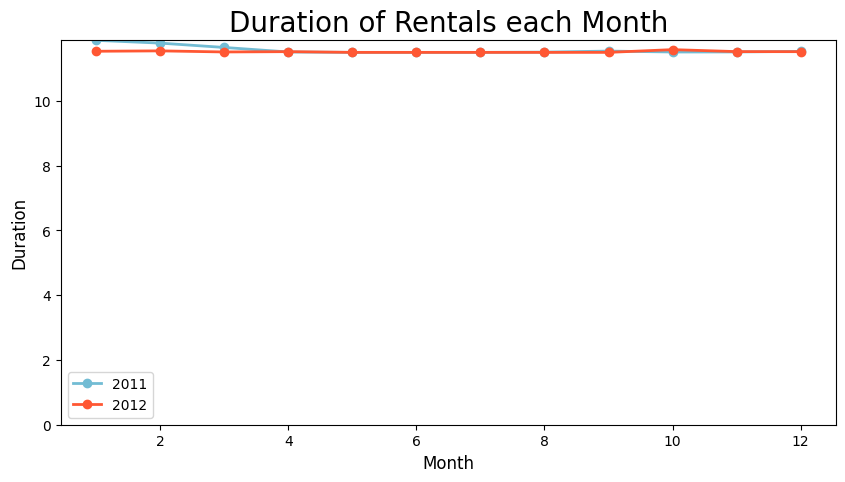

In [233]:
plt.figure(figsize=(10, 5))

# Plot data for 2011
plt.plot(monthly_rental_df_2011["month"], monthly_rental_df_2011["mean_duration"], marker='o', linewidth=2, color="#72BCD4", label="2011")

# Plot data for 2012
plt.plot(monthly_rental_df_2012["month"], monthly_rental_df_2012["mean_duration"], marker='o', linewidth=2, color="#FF5733", label="2012")

plt.title("Duration of Rentals each Month", loc="center", fontsize=20)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Duration", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0)  # Set y-scale from 0
plt.legend()
plt.show()

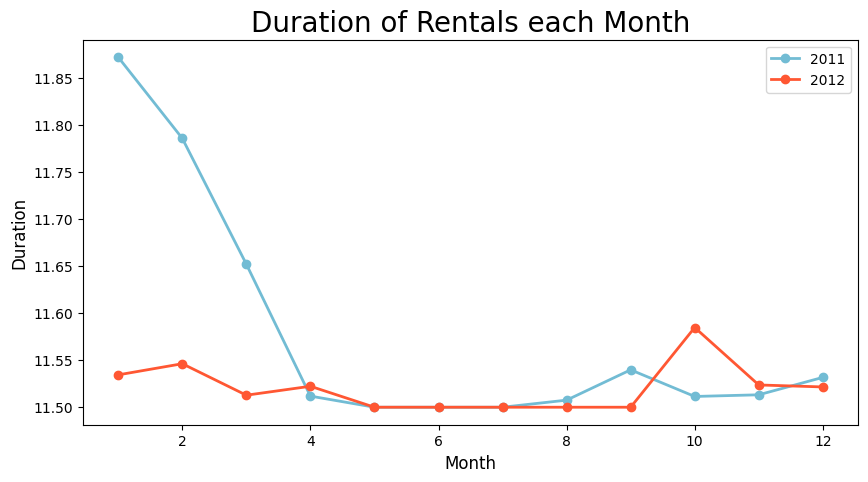

In [234]:
plt.figure(figsize=(10, 5))

# Plot data for 2011
plt.plot(monthly_rental_df_2011["month"], monthly_rental_df_2011["mean_duration"], marker='o', linewidth=2, color="#72BCD4", label="2011")

# Plot data for 2012
plt.plot(monthly_rental_df_2012["month"], monthly_rental_df_2012["mean_duration"], marker='o', linewidth=2, color="#FF5733", label="2012")

plt.title("Duration of Rentals each Month", loc="center", fontsize=20)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Duration", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.ylim(0)  # Set y-scale from 0
plt.legend()
plt.show()

Meskipun pada hasil sebelum total rental tahun 2011 bulan 2 adalah yang terendah, hal ini tidak sejalan dengan durasi peminjamannya yang cukup lebih tinggi rata-ratanya daripada yang lain. Meskipun demikian, peminjaman rata-rata setiap bulannya berkisar di 11.5 jam per harinya

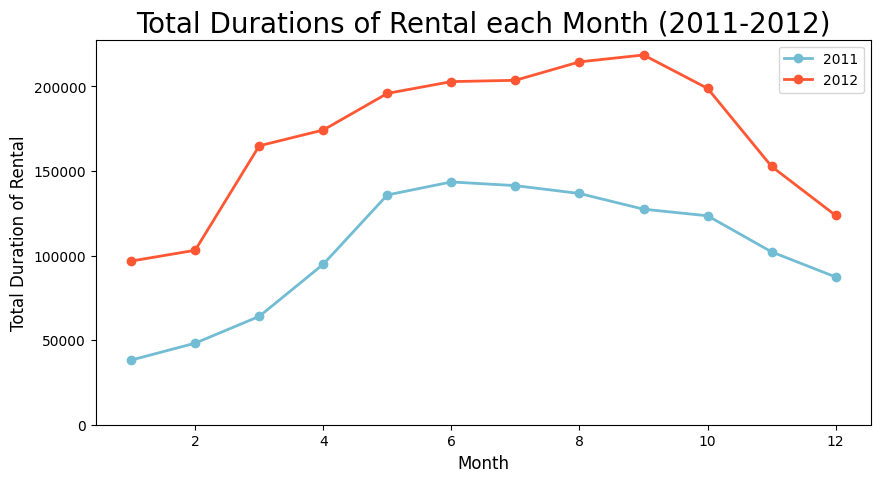

In [235]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the line chart for 2011
ax.plot(monthly_rental_df_2011["month"], monthly_rental_df_2011["total_duration_of_rental"], marker='o', linewidth=2, color="#72BCD4", label="2011")

# Plot the line chart for 2012
ax.plot(monthly_rental_df_2012["month"], monthly_rental_df_2012["total_duration_of_rental"], marker='o', linewidth=2, color="#FF5733", label="2012")

# Set plot title and labels
ax.set_title("Total Durations of Rental each Month (2011-2012)", loc="center", fontsize=20)
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Total Duration of Rental", fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=10)

# Set y-scale from 0
ax.set_ylim(0)

# Add legend
ax.legend()

# Show plot
plt.show()

Sesuai hasil sebelumnya, pada Bulan Mei dan Juli peminjaman pada kedua tahun mendominasi. Akan tetapi, pada tahun 2012 peminjaman pada bulan Agustus dan September melebihi kedua bulan tersebut.

### Pertanyaan 2: pengaruh lingkungan terhadap peminjaman sepeda

Ini adalah tabel proofcheck season setiap bulan

In [236]:
# df = all_df[['dteday', 'season']].copy()
# df

Disesuaikan dengan definisi dari database yang terdapat pada README.md

In [237]:
# Define a function to map month to season based on the provided characteristics
def map_month_to_season(month):
    if month in [12, 1, 2, 3]:
        return 1  # Spring
    elif month in [3, 4, 5, 6]:
        return 2  # Summer
    elif month in [6, 7, 8, 9]:
        return 3  # Fall
    else:
        return 4  # Winter

In [238]:
# Extract month from the 'dteday' column
all_df['month'] = all_df['dteday'].dt.month

# Map month to season
all_df['season'] = all_df['month'].apply(map_month_to_season)

# Resample the DataFrame based on 'season' and calculate aggregated values
seasonal_rental_df = all_df.groupby(['yr', 'season']).agg({
    "cnt": "count",          # Count of rental records for the month
    "temp": "mean",          # Mean temperature for the month
    "hum": "mean",           # Mean humidity for the month
    "windspeed": "mean"      # Mean windspeed for the month
})

# Rename the columns
seasonal_rental_df.rename(columns={
    "cnt": "total_rental",
    "temp": "mean_temperature",
    "hum": "mean_humidity",
    "windspeed": "mean_windspeed"
}, inplace=True)

# Reset index to convert the index to columns
seasonal_rental_df.reset_index(inplace=True)

In [239]:
# Filter DataFrame for year 2011
seasonal_rental_2011 = seasonal_rental_df[seasonal_rental_df['yr'] == 2011].copy()

# Filter DataFrame for year 2012
seasonal_rental_2012 = seasonal_rental_df[seasonal_rental_df['yr'] == 2012].copy()

# # Display the resulting DataFrames
# print("Resampled DataFrame for year 2011:")
# print(seasonal_rental_2011.head())

# print("\nResampled DataFrame for year 2012:")
# print(seasonal_rental_2012.head())

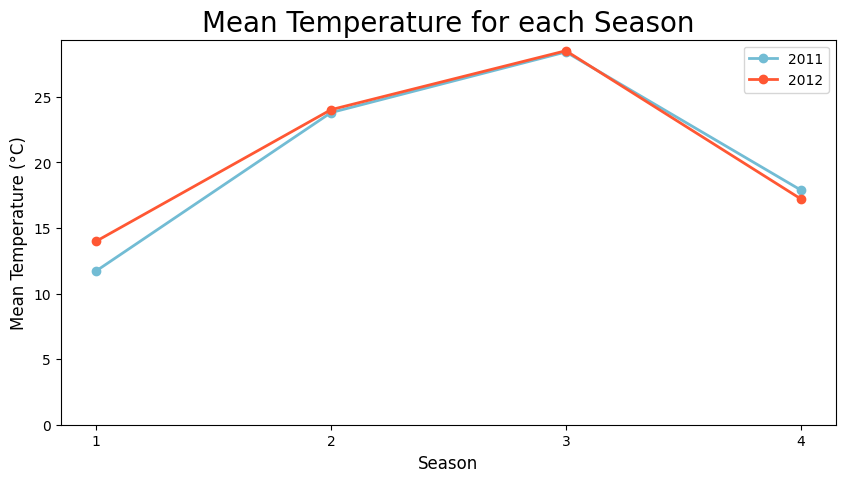

In [240]:
plt.figure(figsize=(10, 5))

# Plot for 2011 data
plt.plot(seasonal_rental_2011["season"], seasonal_rental_2011["mean_temperature"], marker='o', linewidth=2, color="#72BCD4", label='2011')

# Plot for 2012 data
plt.plot(seasonal_rental_2012["season"], seasonal_rental_2012["mean_temperature"], marker='o', linewidth=2, color="#FF5733", label='2012')

plt.title("Mean Temperature for each Season", loc="center", fontsize=20)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Mean Temperature (°C)", fontsize=12)
plt.xticks(seasonal_rental_df["season"].unique(), fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0)  # Set y-scale from 0
plt.legend()
plt.show()

Kedua tahun menunjukkan suhu yang cukup mirip. Suhu tertinggi berdasarkan data terdapat pada musim gugur, sedangkan yang terendah ada di musim semi

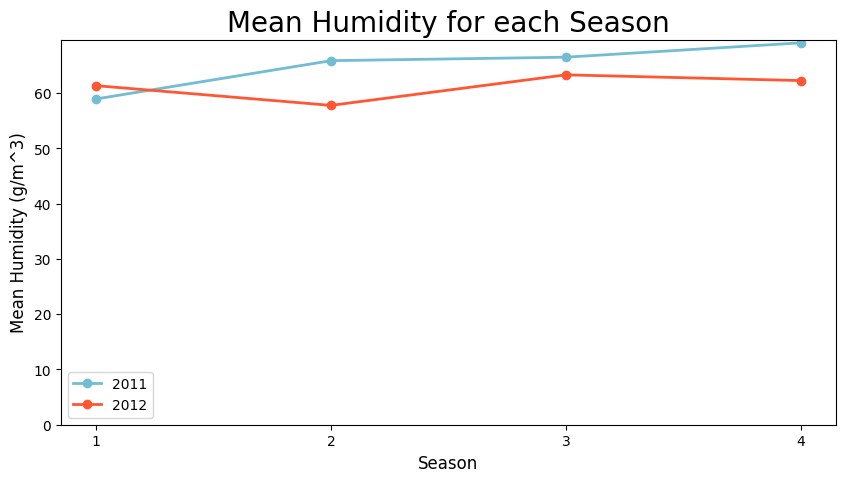

In [241]:
plt.figure(figsize=(10, 5))

# Plot for 2011 data
plt.plot(seasonal_rental_2011["season"], seasonal_rental_2011["mean_humidity"], marker='o', linewidth=2, color="#72BCD4", label='2011')

# Plot for 2012 data
plt.plot(seasonal_rental_2012["season"], seasonal_rental_2012["mean_humidity"], marker='o', linewidth=2, color="#FF5733", label='2012')

plt.title("Mean Humidity for each Season", loc="center", fontsize=20)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Mean Humidity (g/m^3)", fontsize=12)
plt.xticks(seasonal_rental_df["season"].unique(), fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0)  # Set y-scale from 0
plt.legend()
plt.show()

Kelembaban pada tahun 2011 yang terendah adalah musim semi dan tertinggi adalah musim dingin

Kelembaban pada tahun 2012 yang terendah adalah musim panas dan tertinggi adalah musim semi

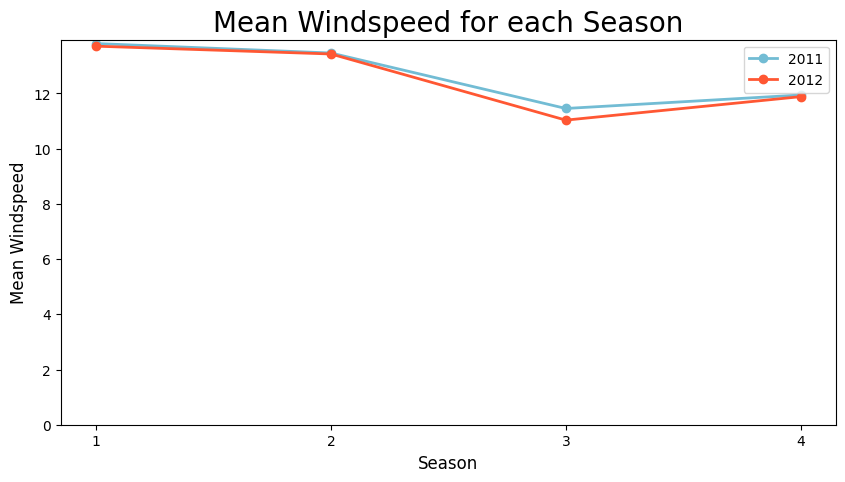

In [242]:
plt.figure(figsize=(10, 5))

# Plot for 2011 data
plt.plot(seasonal_rental_2011["season"], seasonal_rental_2011["mean_windspeed"], marker='o', linewidth=2, color="#72BCD4", label='2011')

# Plot for 2012 data
plt.plot(seasonal_rental_2012["season"], seasonal_rental_2012["mean_windspeed"], marker='o', linewidth=2, color="#FF5733", label='2012')

plt.title("Mean Windspeed for each Season", loc="center", fontsize=20)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Mean Windspeed", fontsize=12)
plt.xticks(seasonal_rental_df["season"].unique(), fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0)  # Set y-scale from 0
plt.legend()
plt.show()

Kedua tahun menunjukkan tren kecepatan angin yang serupa. Kecepatan angin tertinggi terdapat pada musim semi dan terendah terdapat pada musim gugur.

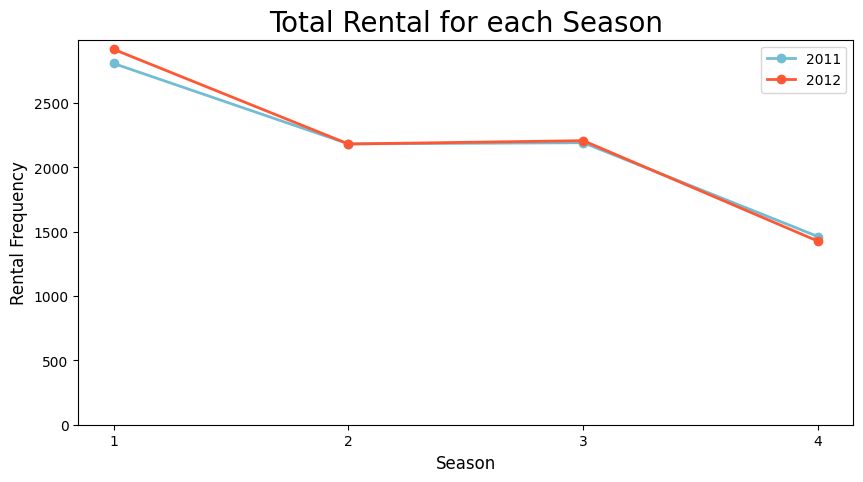

In [243]:
plt.figure(figsize=(10, 5))

# Plot for 2011 data
plt.plot(seasonal_rental_2011["season"], seasonal_rental_2011["total_rental"], marker='o', linewidth=2, color="#72BCD4", label='2011')

# Plot for 2012 data
plt.plot(seasonal_rental_2012["season"], seasonal_rental_2012["total_rental"], marker='o', linewidth=2, color="#FF5733", label='2012')

plt.title("Total Rental for each Season", loc="center", fontsize=20)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Rental Frequency", fontsize=12)
plt.xticks(seasonal_rental_df["season"].unique(), fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0)  # Set y-scale from 0
plt.legend()
plt.show()

Peminjaman sepeda terbanyak pada musim semi

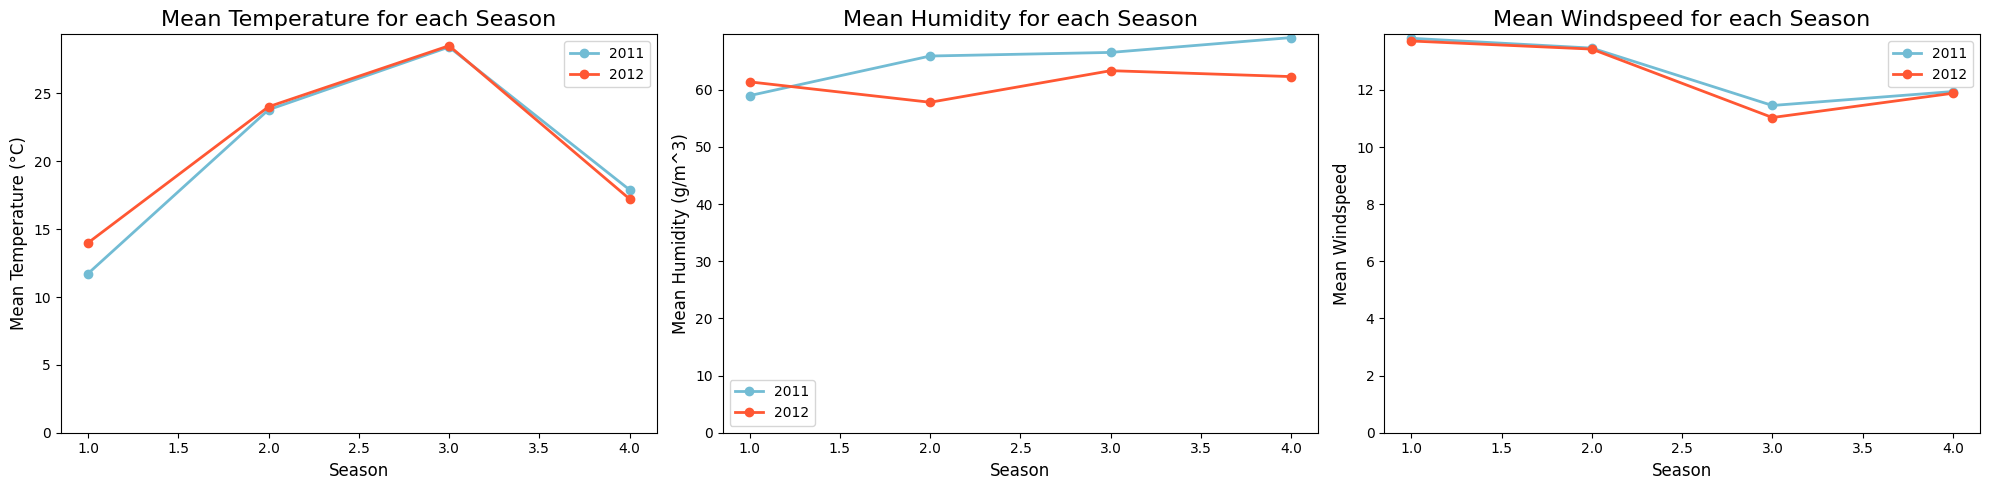

In [244]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot Mean Temperature
axs[0].plot(seasonal_rental_2011["season"], seasonal_rental_2011["mean_temperature"], marker='o', linewidth=2, color="#72BCD4", label='2011')
axs[0].plot(seasonal_rental_2012["season"], seasonal_rental_2012["mean_temperature"], marker='o', linewidth=2, color="#FF5733", label='2012')
axs[0].set_title("Mean Temperature for each Season", fontsize=16)
axs[0].set_xlabel("Season", fontsize=12)
axs[0].set_ylabel("Mean Temperature (°C)", fontsize=12)
axs[0].tick_params(axis='x', labelsize=10)
axs[0].tick_params(axis='y', labelsize=10)
axs[0].set_ylim(0)  # Set y-scale from 0
axs[0].legend()

# Plot Mean Humidity
axs[1].plot(seasonal_rental_2011["season"], seasonal_rental_2011["mean_humidity"], marker='o', linewidth=2, color="#72BCD4", label='2011')
axs[1].plot(seasonal_rental_2012["season"], seasonal_rental_2012["mean_humidity"], marker='o', linewidth=2, color="#FF5733", label='2012')
axs[1].set_title("Mean Humidity for each Season", fontsize=16)
axs[1].set_xlabel("Season", fontsize=12)
axs[1].set_ylabel("Mean Humidity (g/m^3)", fontsize=12)
axs[1].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='y', labelsize=10)
axs[1].set_ylim(0)  # Set y-scale from 0
axs[1].legend()

# Plot Mean Windspeed
axs[2].plot(seasonal_rental_2011["season"], seasonal_rental_2011["mean_windspeed"], marker='o', linewidth=2, color="#72BCD4", label='2011')
axs[2].plot(seasonal_rental_2012["season"], seasonal_rental_2012["mean_windspeed"], marker='o', linewidth=2, color="#FF5733", label='2012')
axs[2].set_title("Mean Windspeed for each Season", fontsize=16)
axs[2].set_xlabel("Season", fontsize=12)
axs[2].set_ylabel("Mean Windspeed", fontsize=12)
axs[2].tick_params(axis='x', labelsize=10)
axs[2].tick_params(axis='y', labelsize=10)
axs[2].set_ylim(0)  # Set y-scale from 0
axs[2].legend()

plt.tight_layout()
plt.show()

Opsional, menyajikannya menjadi matriks 2x2

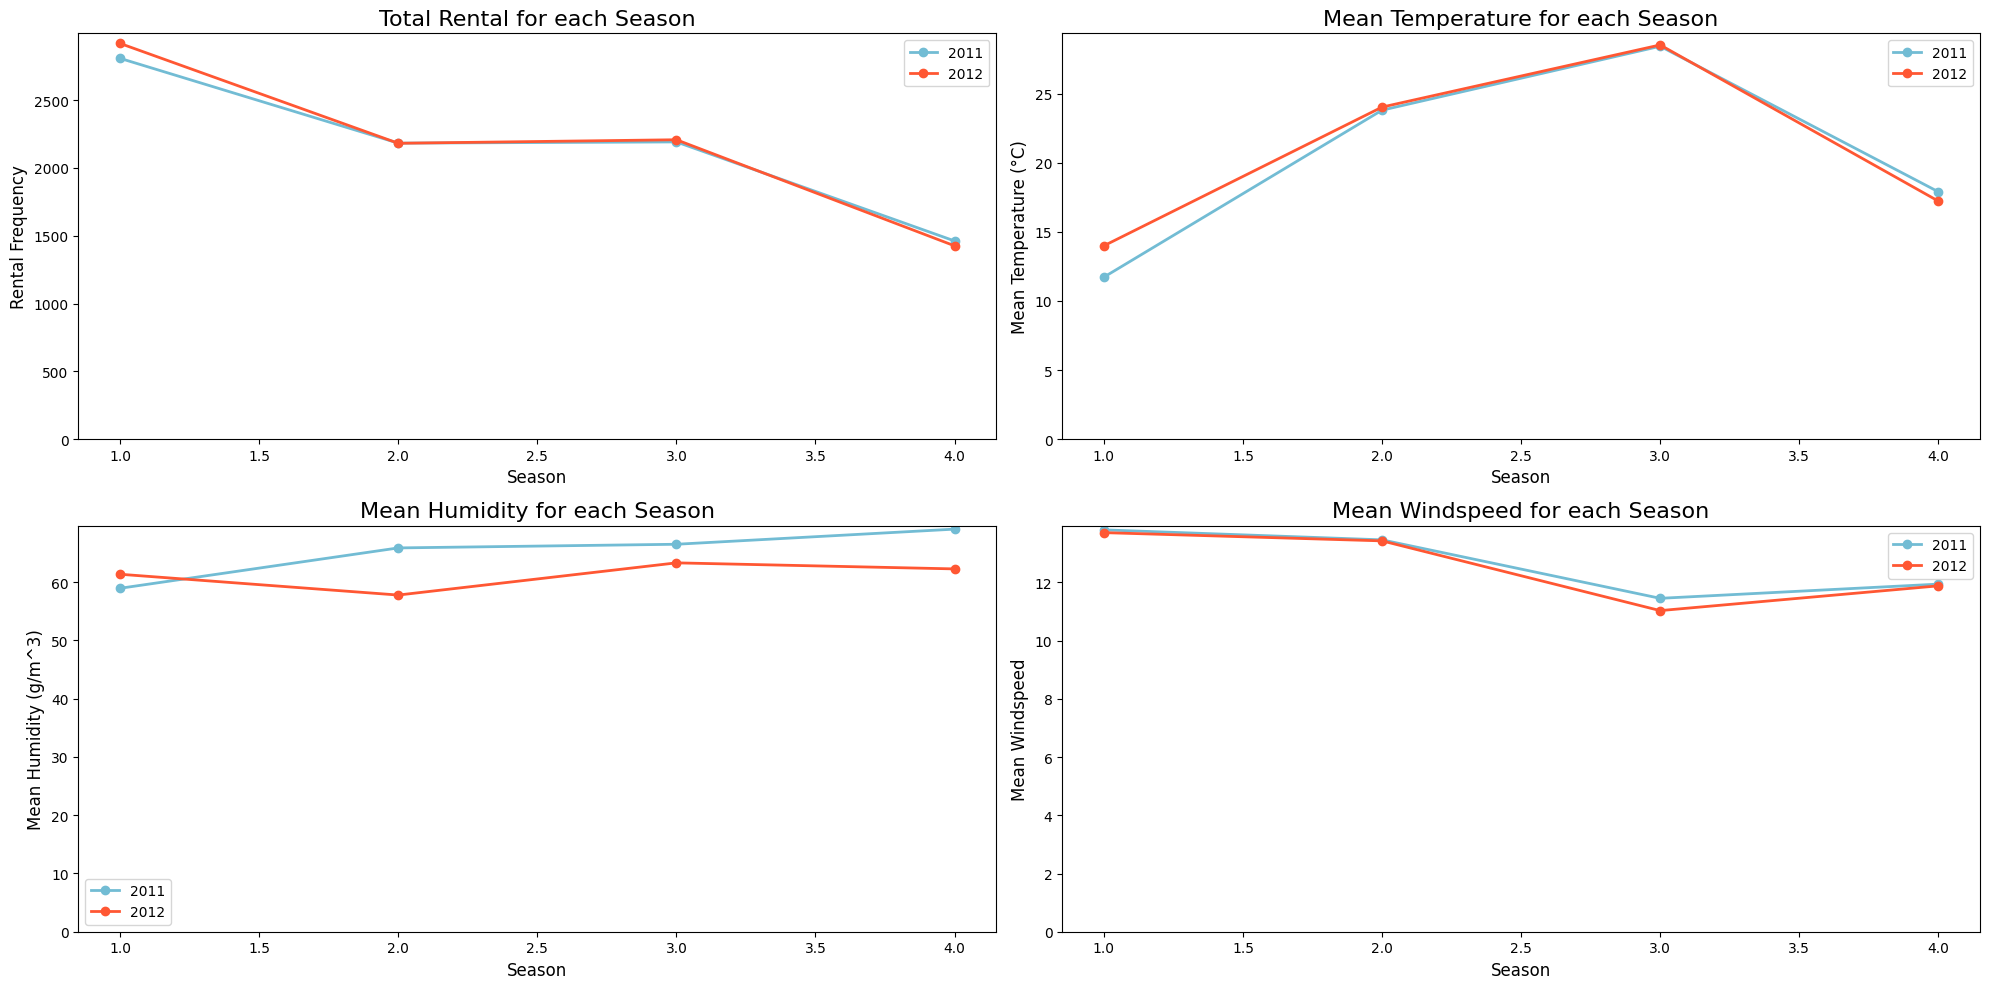

In [245]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Plot Total Rental
axs[0, 0].plot(seasonal_rental_2011["season"], seasonal_rental_2011["total_rental"], marker='o', linewidth=2, color="#72BCD4", label='2011')
axs[0, 0].plot(seasonal_rental_2012["season"], seasonal_rental_2012["total_rental"], marker='o', linewidth=2, color="#FF5733", label='2012')
axs[0, 0].set_title("Total Rental for each Season", fontsize=16)
axs[0, 0].set_xlabel("Season", fontsize=12)
axs[0, 0].set_ylabel("Rental Frequency", fontsize=12)
axs[0, 0].tick_params(axis='x', labelsize=10)
axs[0, 0].tick_params(axis='y', labelsize=10)
axs[0, 0].set_ylim(0)  # Set y-scale from 0
axs[0, 0].legend()

# Plot Mean Temperature
axs[0, 1].plot(seasonal_rental_2011["season"], seasonal_rental_2011["mean_temperature"], marker='o', linewidth=2, color="#72BCD4", label='2011')
axs[0, 1].plot(seasonal_rental_2012["season"], seasonal_rental_2012["mean_temperature"], marker='o', linewidth=2, color="#FF5733", label='2012')
axs[0, 1].set_title("Mean Temperature for each Season", fontsize=16)
axs[0, 1].set_xlabel("Season", fontsize=12)
axs[0, 1].set_ylabel("Mean Temperature (°C)", fontsize=12)
axs[0, 1].tick_params(axis='x', labelsize=10)
axs[0, 1].tick_params(axis='y', labelsize=10)
axs[0, 1].set_ylim(0)  # Set y-scale from 0
axs[0, 1].legend()

# Plot Mean Humidity
axs[1, 0].plot(seasonal_rental_2011["season"], seasonal_rental_2011["mean_humidity"], marker='o', linewidth=2, color="#72BCD4", label='2011')
axs[1, 0].plot(seasonal_rental_2012["season"], seasonal_rental_2012["mean_humidity"], marker='o', linewidth=2, color="#FF5733", label='2012')
axs[1, 0].set_title("Mean Humidity for each Season", fontsize=16)
axs[1, 0].set_xlabel("Season", fontsize=12)
axs[1, 0].set_ylabel("Mean Humidity (g/m^3)", fontsize=12)
axs[1, 0].tick_params(axis='x', labelsize=10)
axs[1, 0].tick_params(axis='y', labelsize=10)
axs[1, 0].set_ylim(0)  # Set y-scale from 0
axs[1, 0].legend()

# Plot Mean Windspeed
axs[1, 1].plot(seasonal_rental_2011["season"], seasonal_rental_2011["mean_windspeed"], marker='o', linewidth=2, color="#72BCD4", label='2011')
axs[1, 1].plot(seasonal_rental_2012["season"], seasonal_rental_2012["mean_windspeed"], marker='o', linewidth=2, color="#FF5733", label='2012')
axs[1, 1].set_title("Mean Windspeed for each Season", fontsize=16)
axs[1, 1].set_xlabel("Season", fontsize=12)
axs[1, 1].set_ylabel("Mean Windspeed", fontsize=12)
axs[1, 1].tick_params(axis='x', labelsize=10)
axs[1, 1].tick_params(axis='y', labelsize=10)
axs[1, 1].set_ylim(0)  # Set y-scale from 0
axs[1, 1].legend()

plt.tight_layout()
plt.show()

Peminjaman terbanyak terjadi pada musim semi
- Suhu rata-rata terendah, sekitar 10 - 15
- Kelembaban rata-rata sekitar 60
- Kecepatan angin rata-rata tertinggi, sekitar 14

### Pertanyaan 3: peminjaman sepeda lebih banyak dilakukan oleh orang yang sedang bekerja atau tidak

<ipython-input-246-75f2ac3ff3eb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


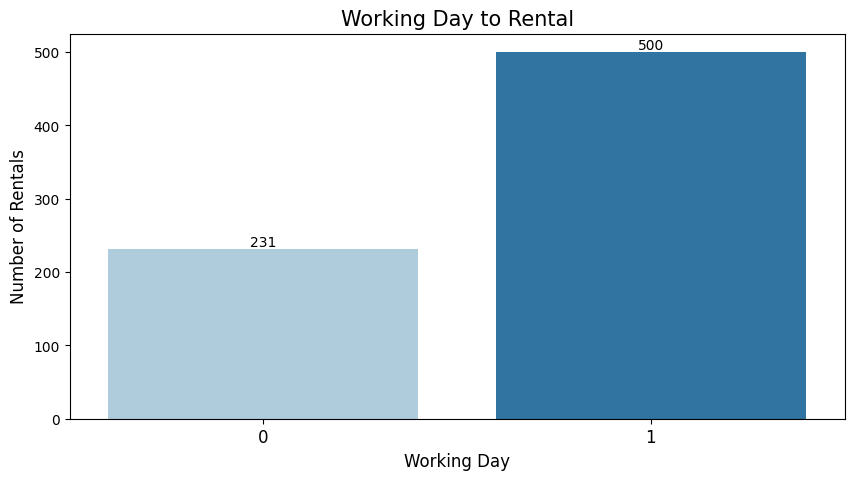

In [246]:
by_workingday_df = all_df.groupby(by="workingday").instant.nunique().reset_index()

plt.figure(figsize=(10, 5))

sns.barplot(
    y="instant",
    x="workingday",
    data=by_workingday_df.sort_values(by="instant", ascending=False),
    palette="Paired"
)
plt.title("Working Day to Rental", loc="center", fontsize=15)
plt.ylabel("Number of Rentals", fontsize=12)
plt.xlabel("Working Day", fontsize=12)
plt.tick_params(axis='x', labelsize=12)

# Add labels to each bar
for index, value in enumerate(by_workingday_df["instant"]):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.show()

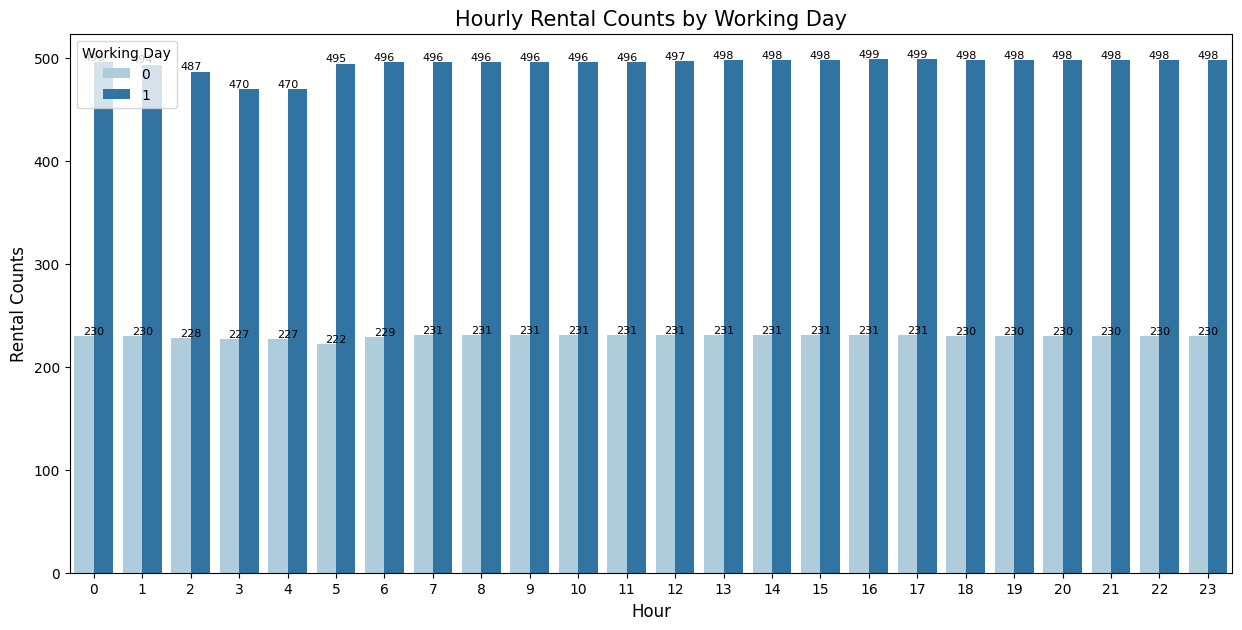

In [247]:
by_workingday_hour_df = hour_df.groupby(by=["workingday", "hr"]).instant.nunique().reset_index()

plt.figure(figsize=(15, 7))

sns.barplot(
    x="hr",
    y="instant",
    hue="workingday",
    data=by_workingday_hour_df,
    palette="Paired"
)
plt.title("Hourly Rental Counts by Working Day", loc="center", fontsize=15)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Rental Counts", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Working Day", fontsize=10)

# Add labels to each bar
for index, row in by_workingday_hour_df.iterrows():
    plt.annotate(row['instant'], xy=(row['hr'], row['instant']), ha='center', va='bottom', fontsize=8)

plt.show()

Peminjaman lebih banyak dilakukan oleh orang di hari kerja dibandingkan pada hari libur.

Tren peminjaman pada hari kerja cukup stabil antara jam 5 pagi hingga 12 malam. Tren peminjaman pada hari libur cukup stabil setiap saatnya, kecuali jam 5 pagi.

In [249]:
all_df.to_csv("all_data.csv", index=False)

## Conclusion

- Performa peminjaman sepeda dalam 2 tahun menunjukkan bahwa Bulan Mei dan Bulan Juli adalah bulan terlaris. Jika dikalkulasikan antara jumlah peminjaman dan durasi peminjaman, Bulan Mei dan Bulan Juli menunjukkan angka yang tertinggi di tahun 2011, namun bukan di tahun 2012.
- Peminjaman terbanyak terjadi pada musim semi dengan rata-rata pada suhu sekitar 10 - 15  (terendah), pada kelembaban sekitar 60, dan pada kecepatan angin sekitar 14 (tertinggi).
- Peminjaman lebih banyak dilakukan oleh orang di hari kerja dibandingkan pada hari libur dengan tren peminjaman pada hari kerja cukup stabil antara jam 5 pagi hingga 12 malam.